# EDP 2019 
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

## Import DBSCAN from sklearn and other necessry library fpr analytics

In [10]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn import preprocessing

%matplotlib inline

## Import data set and list few rows

In [11]:
df = pd.read_csv("test2.csv")
df = df.drop(labels='CRN', axis=1)
df = df.drop(labels='cab_booking_time', axis =1)
df.head()


,pickup,drop_location,gap,extra_charge,car_category,car_type,temperature,overcasted,air_pressure,precipitation,humid_level,strength_of_air
0,North Station,Boston University,3.15,1.00,3,8,20.10,0.62,1030.21,NaN,0.61,3.79
1,South Station,Beacon Hill,2.50,1.00,1,2,41.46,0.90,989.86,NaN,0.78,10.83
2,Boston University,Financial District,3.79,1.25,3,8,34.55,0.99,1003.73,NaN,0.91,7.56
3,Fenway,Back Bay,1.50,1.00,1,2,37.75,0.44,999.27,NaN,0.70,9.97
4,South Station,Theatre District,1.15,1.00,4,9,40.97,0.48,1022.56,NaN,0.59,2.26


## Scatter plot data

In [27]:
features_test_data = df.iloc[:,:-1] 

from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values = np.nan, strategy = 'constant',fill_value = 0)
imputer1 = imputer1.fit(features_test_data)
features_test_data = imputer1.transform(features_test_data)
ohe = preprocessing.OneHotEncoder(sparse=False)
encoded_features_test = features_test_data.copy()
encoded_features_test[:,0] = preprocessing.LabelEncoder().fit_transform(features_test_data[:,0])
encoded_features_test[:,1] = preprocessing.LabelEncoder().fit_transform(features_test_data[:,1])

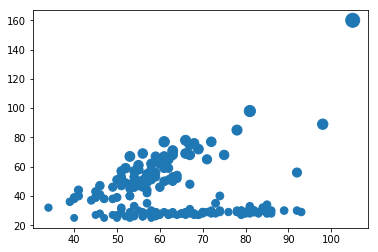

In [6]:
plt.scatter(df.b1,df.b2,df.b3)

## Call DBSCAN method passing epsilon and min sample as argument to form a cluster

In [44]:
model = DBSCAN(eps = 6.1 , min_samples=5).fit(encoded_features_test)
print(model)

DBSCAN(algorithm='auto', eps=6.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)


## DBSCAN forms cluster automattically, check how many clusters are formed

In [45]:
labels=model.labels_
print(labels)

[0 1 1 ... 1 1 1]


In [46]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

3


## And check clusters lables

In [47]:
labels=model.labels_
print(labels)

[0 1 1 ... 1 1 1]


## Create dataframe for each clusters and outlier 

In [51]:
df1 = encoded_features_test[model.labels_ == 0]
df2 = encoded_features_test[model.labels_ == 1]
df3 = encoded_features_test[model.labels_ == 2]
df4 = encoded_features_test[model.labels_ == -1]
print (df1)

[[7 2 3.15 ... 1030.21 0 0.61]
 [3 4 3.55 ... 1034.66 0 0.64]
 [4 9 0.43 ... 1034.07 0 0.74]
 ...
 [0 2 1.46 ... 1035.07 0 0.71]
 [3 10 2.74 ... 1034.03 0 0.81]
 [1 3 2.32 ... 1031.72 0 0.63]]


## Scatter plot all clusters

In [52]:
plt.scatter(df1, color='green')
plt.scatter(df2, color='red')
plt.scatter(df3, color='blue')
plt.scatter(df4, color='black')

TypeError: scatter() missing 1 required positional argument: 'y'

## End

### Generic python code to choose best value of eps and minimum samples

In [29]:
## FInd optimal value of eps 
for ep in np.arange(1,10,1):
    print("ep - "+str(ep))
    for zeps in np.arange(ep,ep+1,0.1):
        model = DBSCAN(eps = zeps , min_samples=5).fit(encoded_features_test)
        labels=model.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1) 
        print ("  eps : "+str(zeps)+" No. of cluster : "+str(n_clusters_) + " Outliers : "+str(n_noise_))       
        #print (Counter(model.labels_))

ep - 1
  eps : 1.0 No. of cluster : 7 Outliers : 7262
  eps : 1.1 No. of cluster : 18 Outliers : 7195
  eps : 1.2000000000000002 No. of cluster : 22 Outliers : 7167
  eps : 1.3000000000000003 No. of cluster : 27 Outliers : 7131
  eps : 1.4000000000000004 No. of cluster : 34 Outliers : 7082
  eps : 1.5000000000000004 No. of cluster : 87 Outliers : 6667
  eps : 1.6000000000000005 No. of cluster : 96 Outliers : 6551
  eps : 1.7000000000000006 No. of cluster : 108 Outliers : 6429
  eps : 1.8000000000000007 No. of cluster : 129 Outliers : 6217
  eps : 1.9000000000000008 No. of cluster : 146 Outliers : 6058
ep - 2
  eps : 2.0 No. of cluster : 158 Outliers : 5899
  eps : 2.1 No. of cluster : 171 Outliers : 5679
  eps : 2.2 No. of cluster : 188 Outliers : 5473
  eps : 2.3000000000000003 No. of cluster : 211 Outliers : 4981
  eps : 2.4000000000000004 No. of cluster : 213 Outliers : 4640
  eps : 2.5000000000000004 No. of cluster : 216 Outliers : 4291
  eps : 2.6000000000000005 No. of cluster : 2